Link tham khảo: https://github.com/Megalinux/Crypto_2_Polinomial_Regression

In [40]:
import numpy as np
class Tools:
    def __init__(self):
        print("")
    
    def MSE(self,l,p):
        return np.mean((l-p) ** 2)

In [41]:
import numpy as np      
import pandas as pd
from pylab import plt,mpl
import ccxt
import calendar
from datetime import datetime
from sympy import Symbol,expand

In [42]:


#Set parameters of Matplotlib
np.random.seed(100)
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'



C:\Users\Administrator\AppData\Local\Temp\ipykernel_11612\1847505613.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [53]:
#Uses the binance method of the ccxt library to download the data
binance = ccxt.binance()
now = datetime.utcnow()

unixtime = calendar.timegm(now.utctimetuple())
da = (unixtime - 300*300) * 1000 

ohlcv = binance.fetch_ohlcv(symbol='ETH/BTC', timeframe='5m',since=da) # type: list
df = pd.DataFrame(ohlcv)
df1 = pd.DataFrame(ohlcv, columns = ['Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
columns = df.columns
print(columns)

# df1['Time'] = [datetime.fromtimestamp(float(time)/1000) for time in df1['Time']]
# df1.set_index('Time')



RangeIndex(start=0, stop=6, step=1)


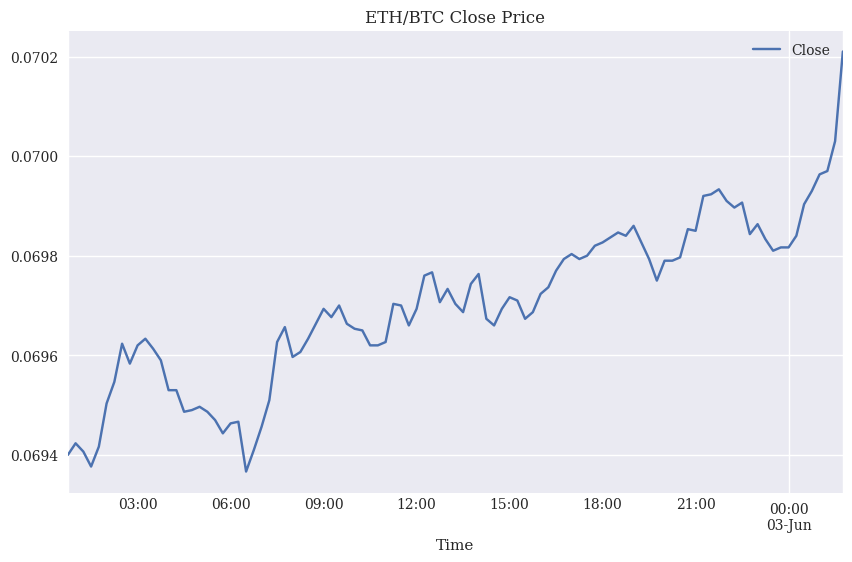

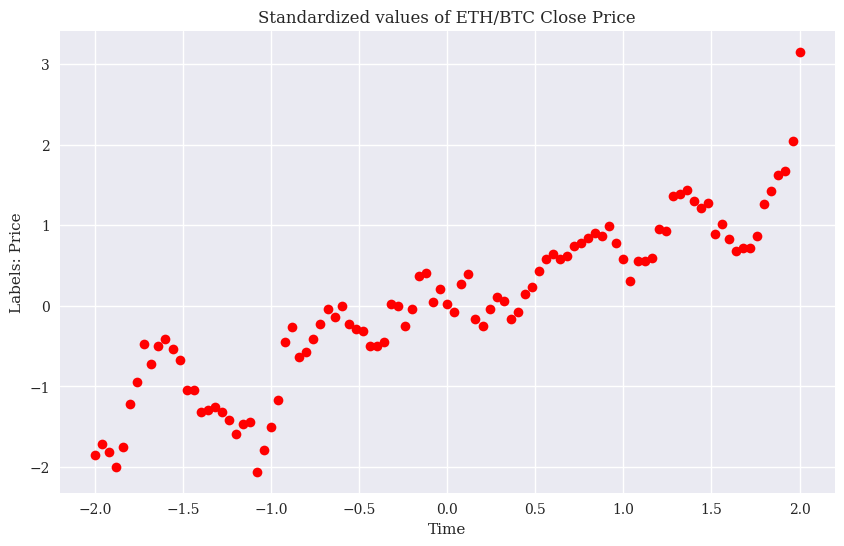

In [44]:


#Set the resample interval of 15 minute
df1_risultato = df1.resample('15T', on = 'Time').mean()

#View the 'Close' price chart of the ETH / BTC pair of the Binance exchange
df1_risultato.plot(y='Close',figsize=(10,6), title="ETH/BTC Close Price")
plt.show()

#Perform standardization
l = df1_risultato['Close'].values
l = (l-l.mean()) / np.std(l)
f = np.linspace(-2,2, len(l))

#Displays the standardized values ​​of the ETH / BTC cryptocurrency pair
plt.figure(figsize=(10,6))
plt.plot(f,l,'ro')
plt.title('Standardized values of ETH/BTC Close Price')
plt.xlabel('Time')
plt.ylabel('Labels: Price')
plt.show()

0.0855683969838584*x**5 + 0.0636634243319286*x**4 - 0.370607680761884*x**3 - 0.205807858087516*x**2 + 1.07763199345037*x + 0.0679730279615384

0.170173306266
0.151594853923
0.091324083735


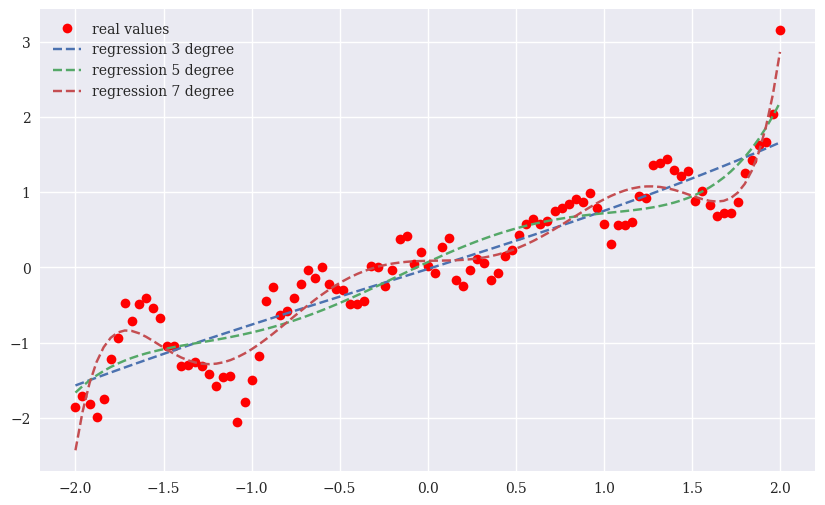

In [45]:


#Calculate the fifth degree equation with the estimated coefficients
reg = np.polyfit(f,l,deg=5)
equazione = np.poly1d(reg)
x=Symbol('x')
#print function with coefficients
print(expand(equazione(x)))

#Calculate the approximate functions of the third, fifth and seventh degree
p = np.polyval(reg,f) #valori predetti di quinto grado 
reg1 = np.polyfit(f,l,deg=3) #coefficienti funzione di terzo grado
reg2 = np.polyfit(f,l,deg=7) #coefficienti funzione di settimo grado
p1 = np.polyval(reg1,f) #valori predetti di terzo grado
p2 = np.polyval(reg2,f) #valori predetti di settimo grado


tl1 = Tools()
#Print MSE values
print('%.12f' % tl1.MSE(l,p1)) #terzo grado
print('%.12f' % tl1.MSE(l,p)) #quinto grado
print('%.12f' % tl1.MSE(l,p2)) #settimo grado

#Displays the approximation functions
plt.figure(figsize=(10,6))
plt.plot(f,l,'ro',label='real values')
plt.plot(f,p1,'--', label = 'regression 3 degree')
plt.plot(f,p, '--', label = 'regression 5 degree') 
plt.plot(f,p2,'--', label = 'regression 7 degree')
plt.legend()


*********************
Predict values: 
*********************
1.698922796169
2.387229079903
3.561201571819


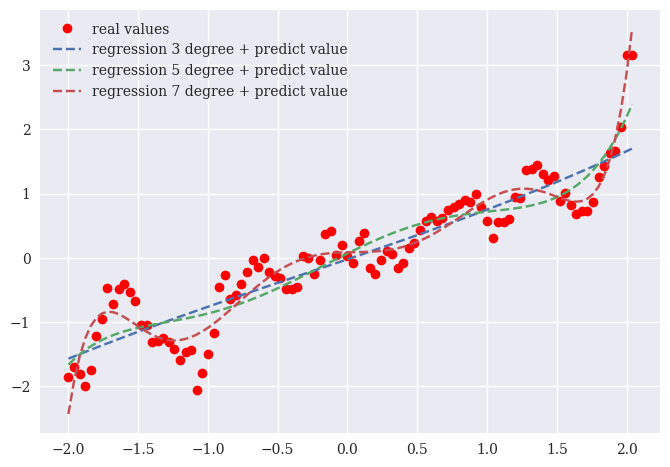

1.0423765410595767
*********************
Price values: 
*********************
0.06997494900166602
0.07008640945641718
0.07027651596990783


In [47]:


#Set the labels in the fifth degree function
"""for a,b in zip(f, p2): 
    plt.text(a, b, "{:.12f}".format(b))"""

plt.show()

#Calculate the step of 5 minute for the future value
c = 2*2 / f.size #measure of 5 minute; 2 (remember size -2 to +2) equal max = last value of time
d = 2+c #last value of time plus c 

#add value d to numpy array f1
f1= np.append(f,d)
#add len(l)-1 to numpy array l1
l1 = np.append(l,l[len(l)-1])


#Calcolate the future value (in this case 5 minute) 
predetto5grado = np.polyval(reg,d)
predetto3grado = np.polyval(reg1,d)
predetto7grado = np.polyval(reg2,d)

#add predict value to numpy array of regression degree on last position
p1p = np.append(p1,predetto3grado)
p2p = np.append(p2,predetto7grado)
pp = np.append(p,predetto5grado)
print('*********************')
print('Predict values: ')
print('*********************')
print('%.12f' % predetto3grado) 
print('%.12f' % predetto5grado) 
print('%.12f' % predetto7grado) 

#print of regression degree + predict value
plt.plot(f1,l1,'ro',label='real values')
plt.plot(f1,p1p,'--',label='regression 3 degree + predict value')
plt.plot(f1,pp,'--',label='regression 5 degree + predict value')
plt.plot(f1,p2p,'--',label='regression 7 degree + predict value')
plt.legend()
plt.show()

#trasform the predict value in price value
print(np.std(l1))
cl = df1_risultato['Close'].values
price3grado = (float(predetto3grado) * float(np.std(cl))) +float(cl.mean())
price5grado = (float(predetto5grado) * float(np.std(cl))) +float(cl.mean())
price7grado = (float(predetto7grado) * float(np.std(cl))) +float(cl.mean())

print('*********************')
print('Price values: ')
print('*********************')
print(price3grado)
print(price5grado)
print(price7grado)